In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,KFold
%matplotlib inline

In [2]:
data=pd.read_csv(r'D:\MUKUL ML\kaggle\advance regression\train.csv')

In [3]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
data['Agblt']= (data['YrSold']-data['YearBuilt']).abs()
data['AgeRemdl'] = (data['YrSold']-data['YearRemodAdd']).abs()

In [6]:
CatCols=[i for i in data.columns if data.loc[:,i].dtype=='object']
Numcols=list(set(data.columns)-set(CatCols))

In [7]:
CatCols

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [8]:
Numcols

['BsmtHalfBath',
 'ScreenPorch',
 '1stFlrSF',
 'YearRemodAdd',
 'FullBath',
 'TotRmsAbvGrd',
 '3SsnPorch',
 'GarageCars',
 'WoodDeckSF',
 'KitchenAbvGr',
 'GarageYrBlt',
 'OpenPorchSF',
 'AgeRemdl',
 '2ndFlrSF',
 'OverallCond',
 'HalfBath',
 'BsmtFinSF1',
 'BsmtFullBath',
 'LotArea',
 'LowQualFinSF',
 'YearBuilt',
 'EnclosedPorch',
 'Fireplaces',
 'LotFrontage',
 'BsmtFinSF2',
 'Agblt',
 'GarageArea',
 'BedroomAbvGr',
 'TotalBsmtSF',
 'MasVnrArea',
 'YrSold',
 'BsmtUnfSF',
 'PoolArea',
 'Id',
 'OverallQual',
 'GrLivArea',
 'SalePrice',
 'MoSold',
 'MSSubClass',
 'MiscVal']

In [9]:
Numcols.remove('Id')

In [10]:
Numcols.remove('SalePrice')

# Handling missing values

In categorical columns

In [11]:
data[CatCols]=data[CatCols].fillna('None')

in numerical columns

In [12]:
NumMiss=[i for i in Numcols if data.loc[:,i].isna().sum()>0]
NumMiss

['GarageYrBlt', 'LotFrontage', 'MasVnrArea']

In [13]:
from scipy.stats  import skew,kurtosis,iqr

skewness of LotFrontage :2.16


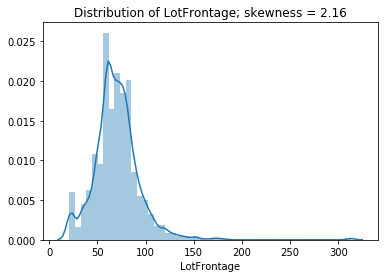

In [14]:
print('skewness of LotFrontage :{:.2f}'.format(data.LotFrontage.skew()))
ax=sns.distplot(data["LotFrontage"])
ax.set_title(f'Distribution of LotFrontage; skewness = {data.LotFrontage.skew():.2f}');


In [15]:
data.LotFrontage.isna().sum()

259

In [16]:
data['LotFrontage']=data['LotFrontage'].fillna(data.LotFrontage.median())


GarageYrBlt: : Year garage was built


Missing value for GarageYrBlt means zero because the GarageType=None which means there is no garage



In [17]:
data['GarageYrBlt']=data['GarageYrBlt'].fillna(0)


MasVnrArea: Masonry veneer area in square feet
    
Missing value for MasVnrArea means zero because the MasVnrType=None which means there is no Masonry veneer



In [18]:
data['MasVnrArea']=data['MasVnrArea'].fillna(0)

# handling outliers

Target variable highly skewed to the right and it may results in poor prediction. One possible solution can be predicting Log_SalePrice instead of SalePrice, but it is hard to interpret the result. For now I keep it as it is: y=SalePrice



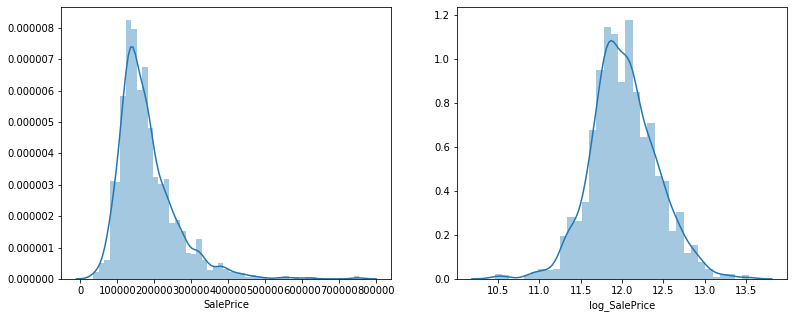

In [19]:
data['log_SalePrice']=np.log(data['SalePrice'])
fig,ax=plt.subplots(ncols=2,figsize=(13,5))
sns.distplot(data['SalePrice'],ax=ax[0])
sns.distplot(data['log_SalePrice'],ax=ax[1])



# feature selection


highlt correlated variable with sale price

These are the best predictors to start with

In [20]:
corr_target=data[Numcols].apply(lambda x: x.corr(data['SalePrice'])).abs().sort_values(ascending=False)

high_corr=corr_target[(corr_target > 0.5) & (corr_target<1)]
high_corr.reset_index()

,index,0
0,OverallQual,0.790982
1,GrLivArea,0.708624
2,GarageCars,0.640409
3,GarageArea,0.623431
4,TotalBsmtSF,0.613581
5,1stFlrSF,0.605852
6,FullBath,0.560664
7,TotRmsAbvGrd,0.533723
8,Agblt,0.523350
9,YearBuilt,0.522897


Text(0.5, 1, 'Correlations between selected features that are highly correlated with target')

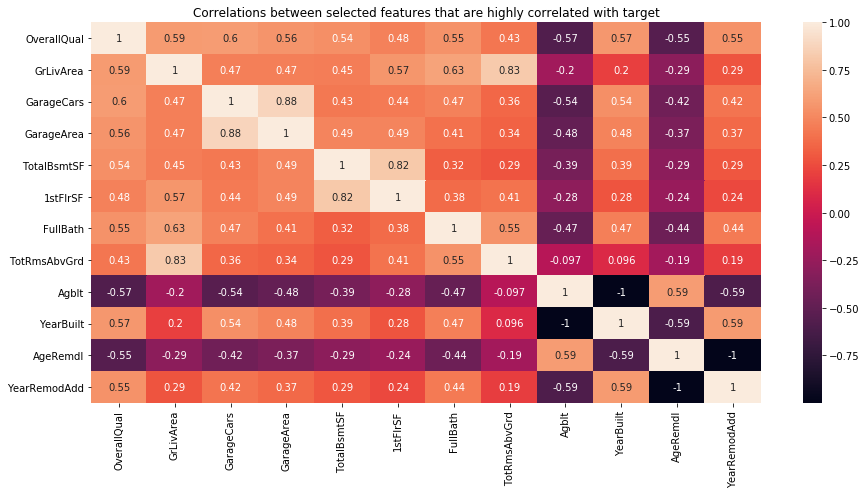

In [21]:
NumPred=list(high_corr.reset_index().iloc[:,0])
corr_matrix=data.loc[:,NumPred].corr()
plt.figure(figsize=(15,7))
sns.heatmap(corr_matrix,annot=True,square=False)
plt.title('Correlations between selected features that are highly correlated with target')

In [22]:
corr_numpred=[]
for i in range(len(NumPred)-1):
    for j in range(i+1,len(NumPred)):
        if (np.absolute(data[NumPred[i]].corr(data[NumPred[j]]))>0.6):
            corr_numpred.append(NumPred[j])
            

In [23]:
NewNumPred=list(set(NumPred)-set(corr_numpred))

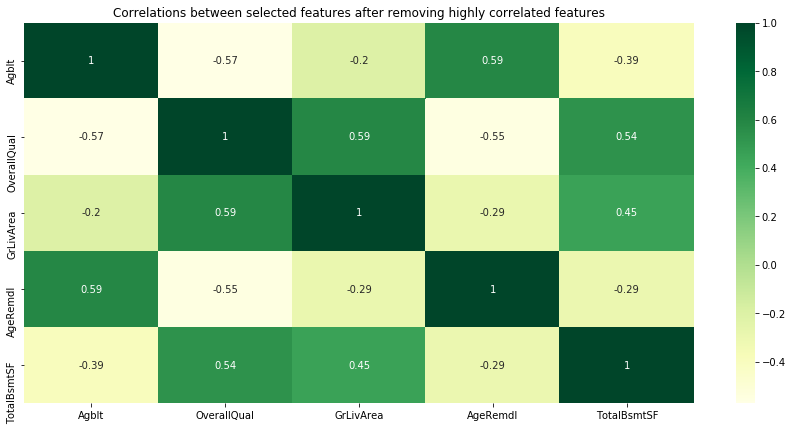

In [24]:
corr_matrix=data.loc[:,NewNumPred].corr()
plt.figure(figsize=(15,7))
sns.heatmap(corr_matrix,cmap='YlGn',annot=True,square=False)
plt.title('Correlations between selected features after removing highly correlated features');


# Feature selection/engineering: numerical features


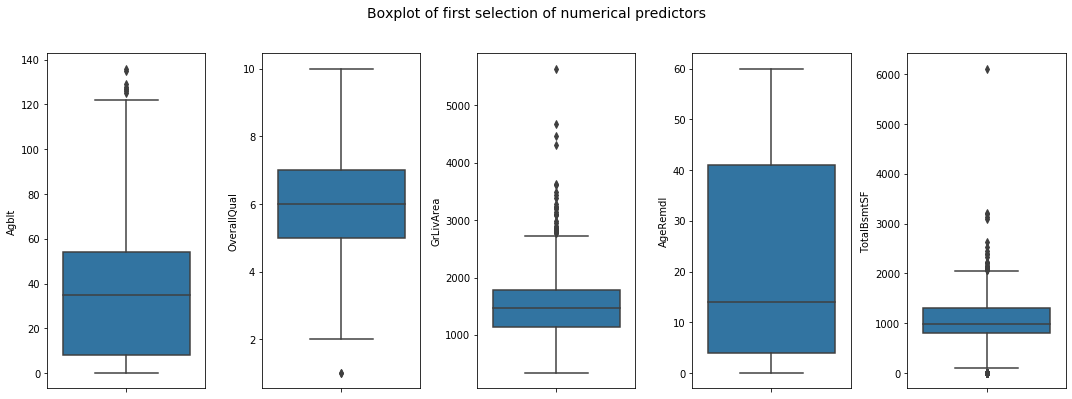

In [25]:
fig, ax=plt.subplots(ncols=len(NewNumPred), figsize=(15, 5))
fig.suptitle('Boxplot of first selection of numerical predictors', y=1.1, fontsize=14)
for i, ax in enumerate(fig.axes):
    if i < len(NewNumPred):
        sns.boxplot(y=NewNumPred[i], data=data, ax=ax)
fig.tight_layout();

In [26]:
# Choosing numerical predictors with meaningful distribution
NumPreds=['TotalBsmtSF','OverallQual','OverallCond','GrLivArea','GarageCars' ,'Agblt', 
          'MasVnrArea', 'BedroomAbvGr', 'Fireplaces','AgeRemdl','BsmtFinSF1']


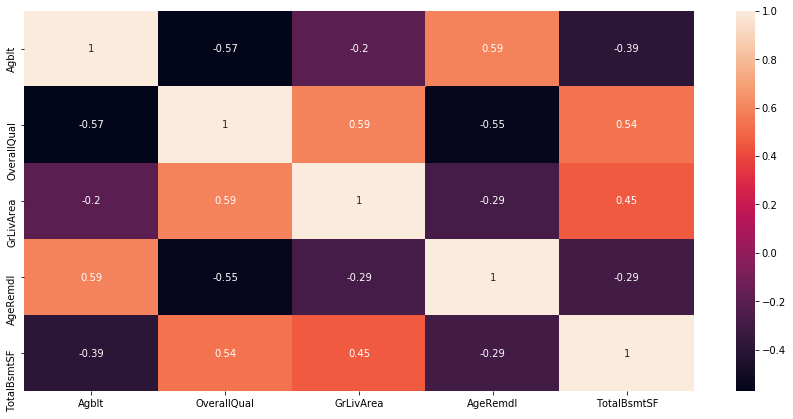

In [27]:
corr_matix=data.loc[:,NumPred].corr()
plt.figure(figsize=(15,7))
sns.heatmap(corr_matrix,annot=True,square=False)

# Feature selection/engineering: categorical features

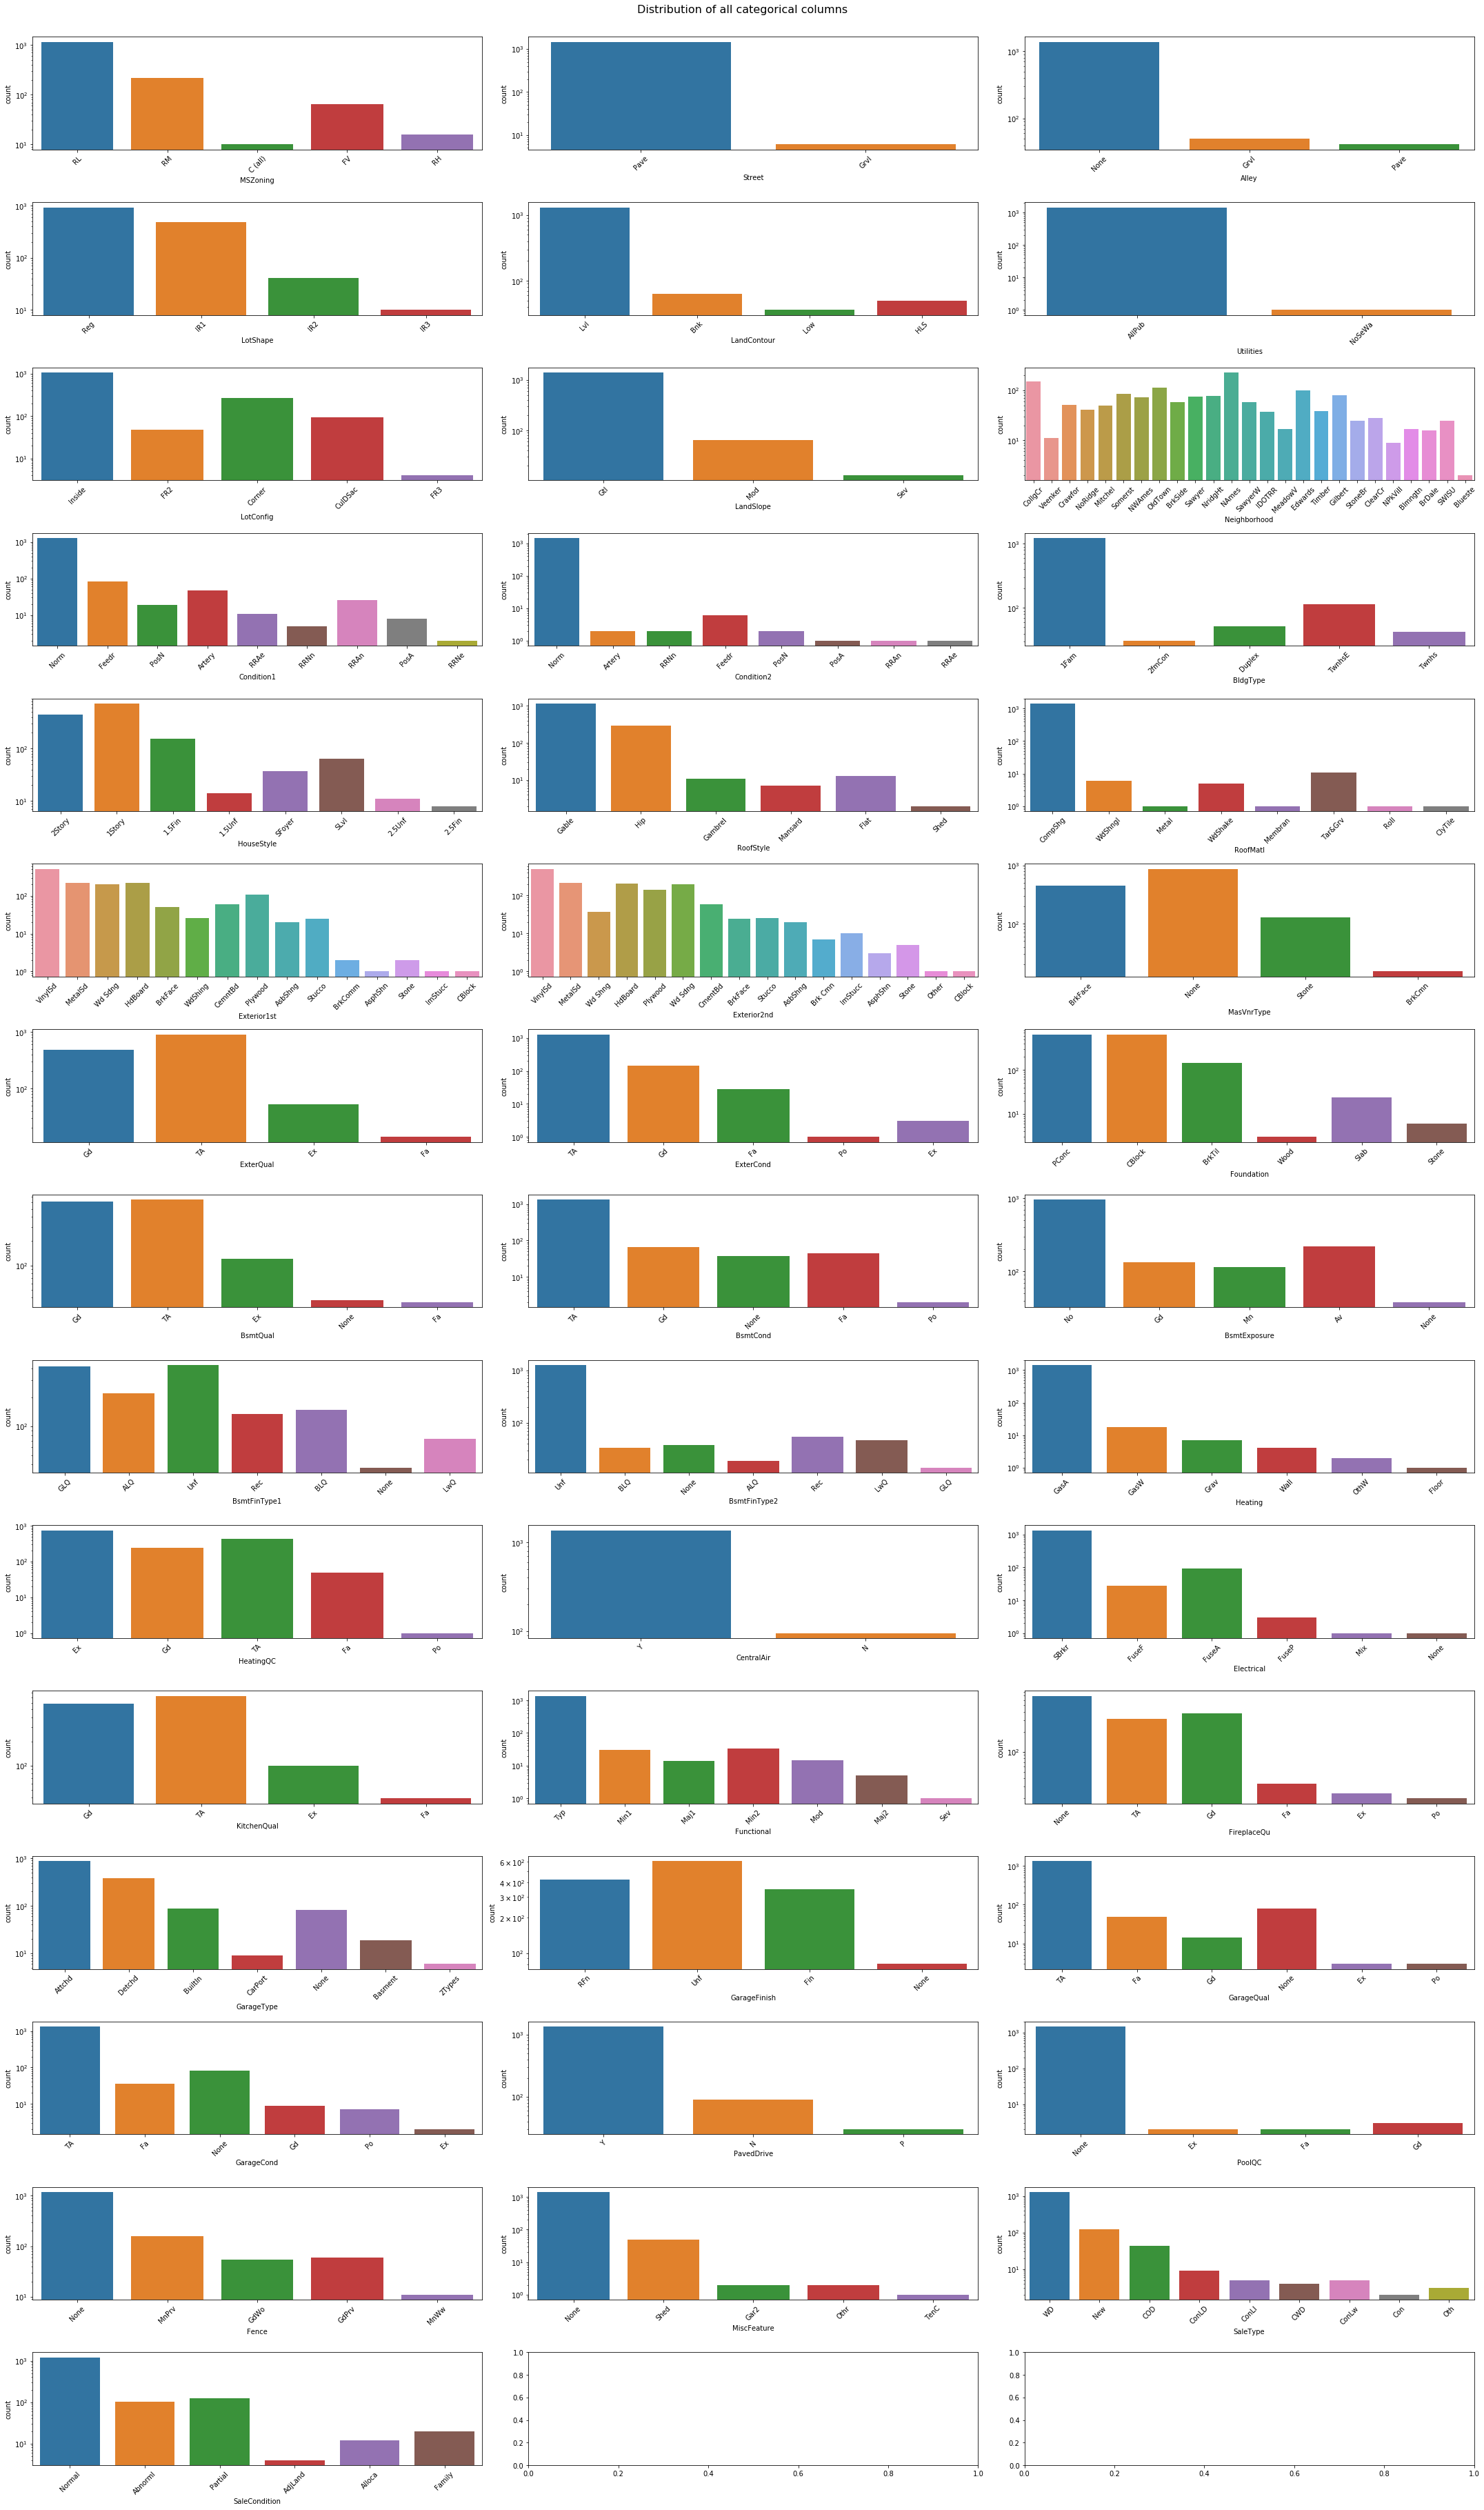

In [28]:
fig, ax= plt.subplots(nrows=int(len(CatCols) / 3)+1, ncols=3, figsize=(30, 50))
fig.suptitle('Distribution of all categorical columns',y=1.01, fontsize=16)
for i, ax in enumerate(fig.axes):
    if i <len(CatCols):
        sns.countplot(x=CatCols[i],data=data,ax=ax)
        ax.set_yscale('log')
        ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
        
fig.tight_layout()

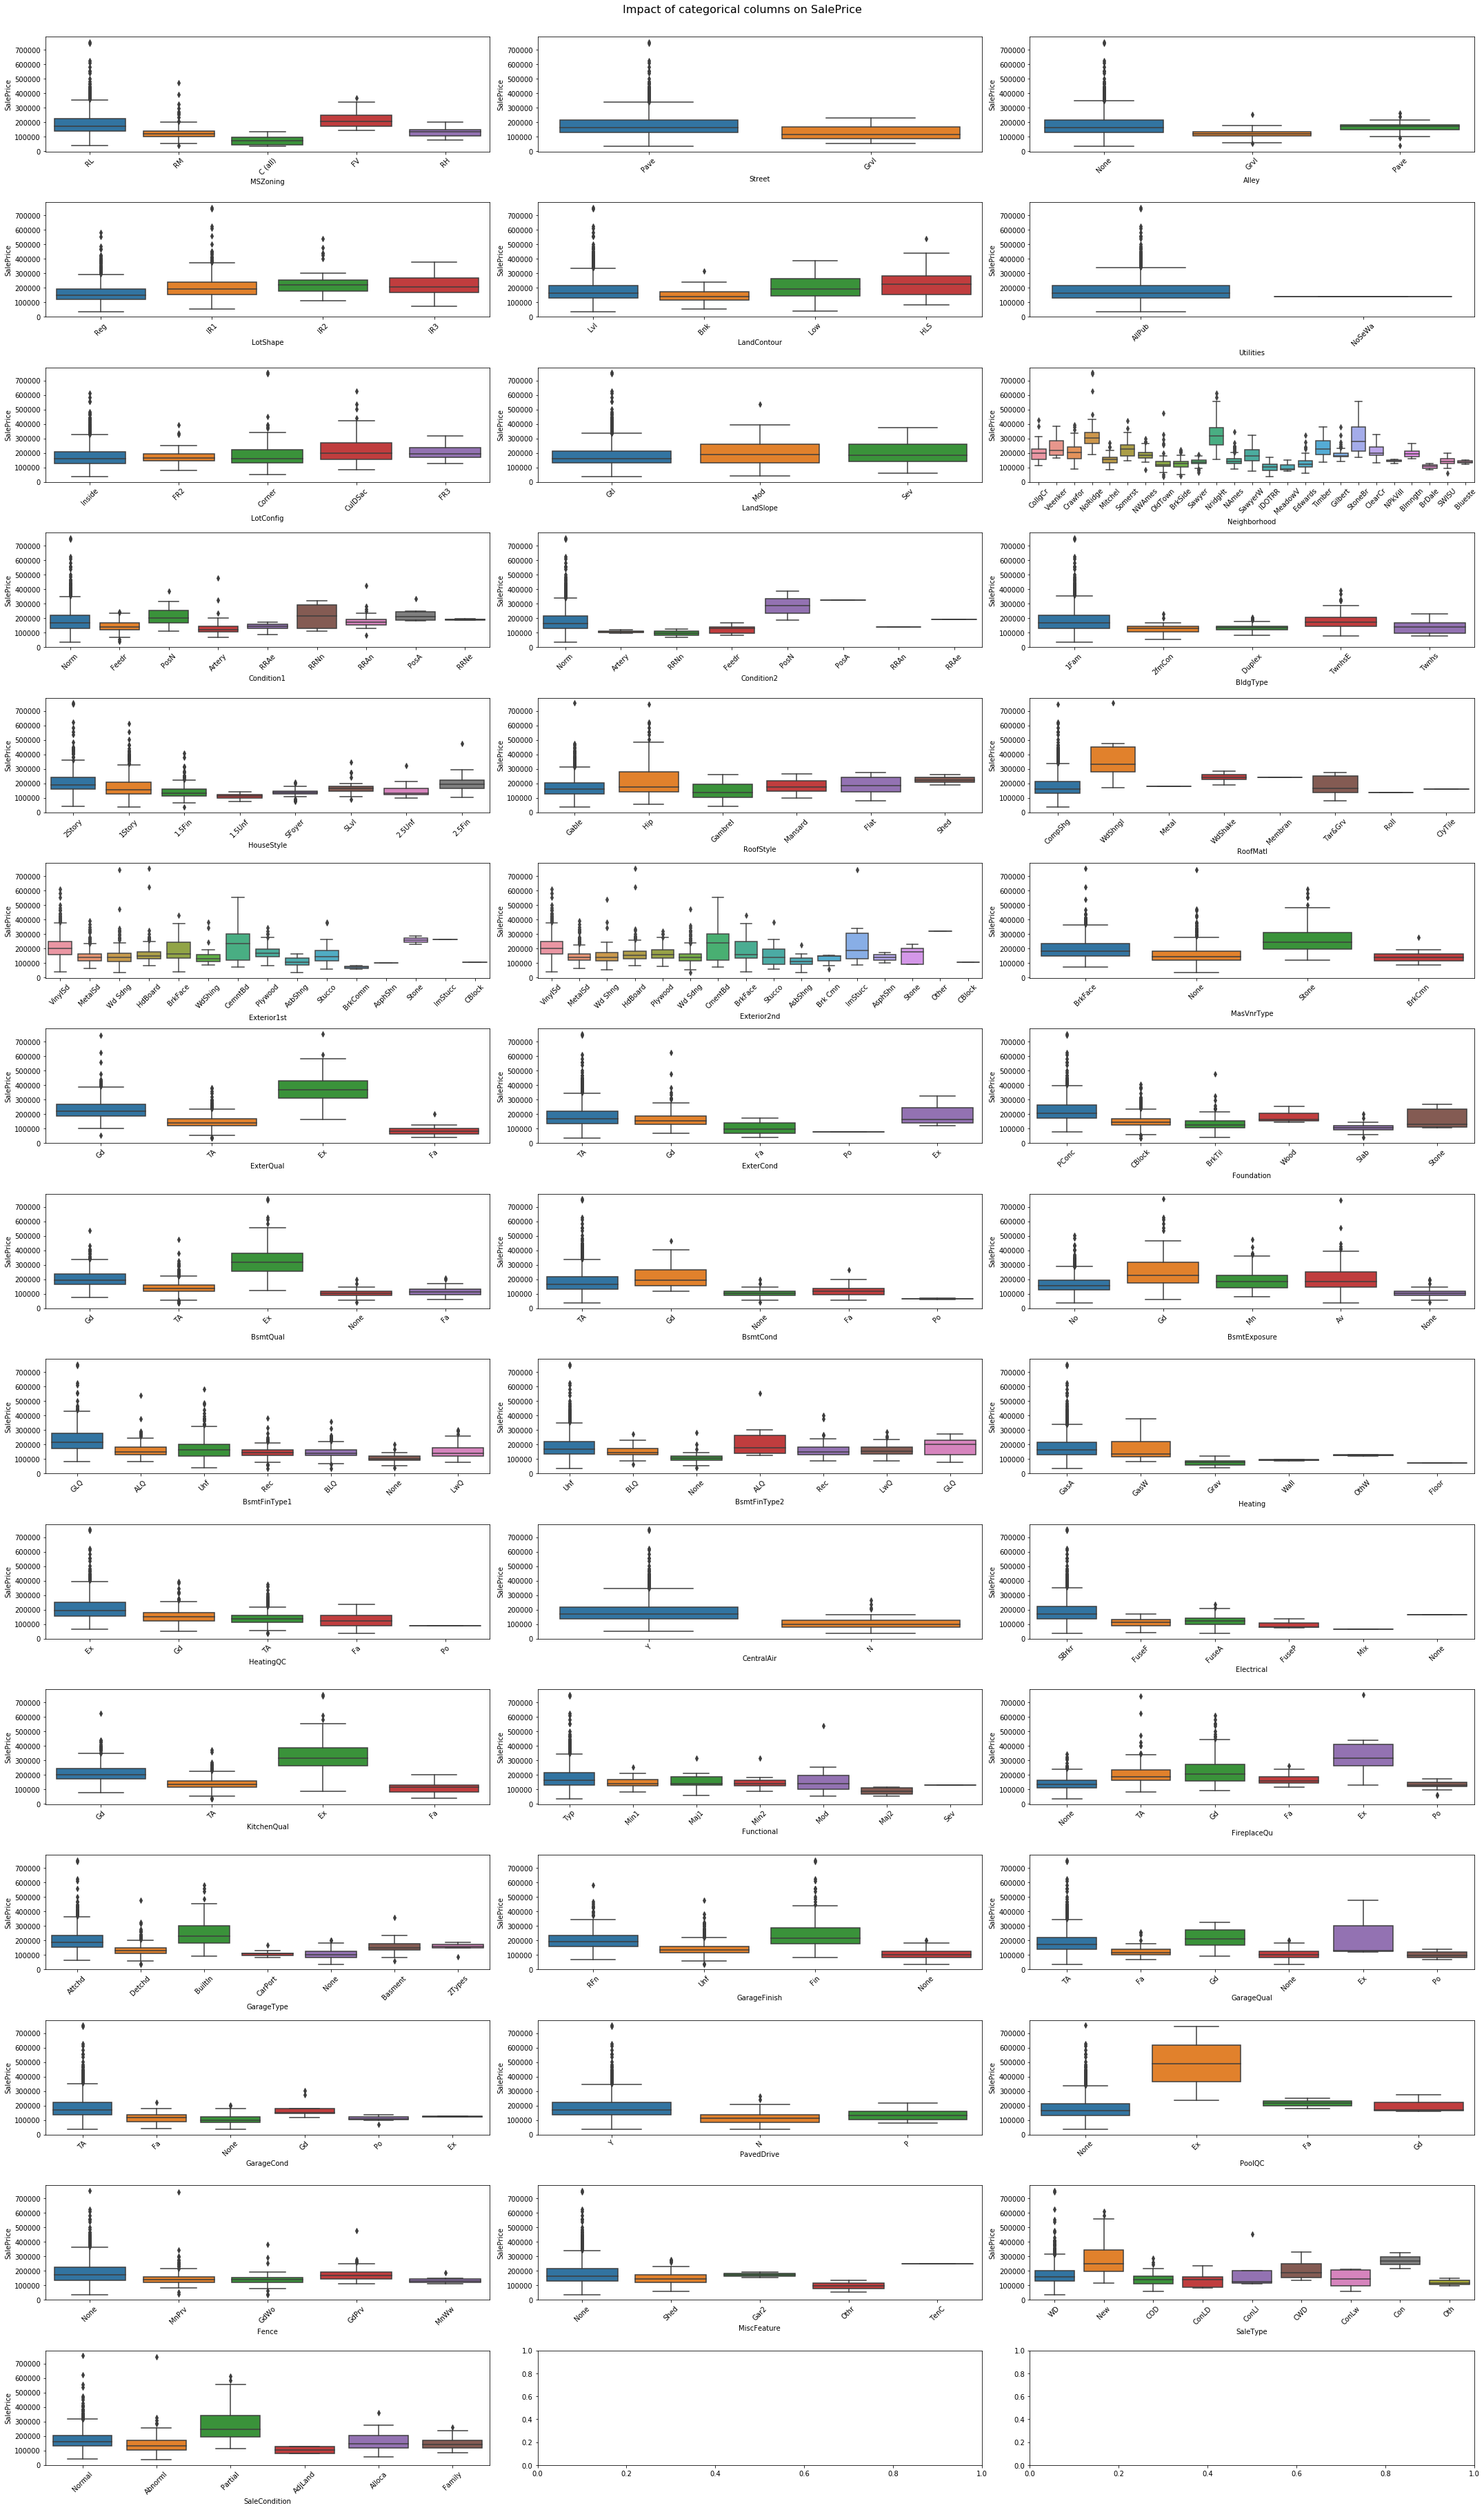

In [29]:
fig, ax= plt.subplots(nrows=int(len(CatCols) / 3)+1, ncols=3, figsize=(30, 50))
fig.suptitle('Impact of categorical columns on SalePrice',y=1.01, fontsize=16)
for i , ax in enumerate(fig.axes):
    if i < len(CatCols):
        sns.boxplot(x=CatCols[i],y='SalePrice',data=data,ax=ax)
        ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

fig.tight_layout()
        
        

Choose the categorical variables that have impact on the boxplot of the target variable. Because in most cases the number of the observations in each category is less than number_of_categories+1 (ANOVA condition), ANOVA test cannot be used for feture selection. Also Chi2 test cannot be used for categorical features correlation test because there exists categorical features that have less than 6 observations in some of their categories.



In [30]:
CatPreds=['Neighborhood','MSSubClass','MSZoning','ExterQual','MasVnrType','BsmtExposure',
          'BsmtFinType1','SaleType','SaleCondition',  'KitchenQual', 'Functional', 'LandSlope', 'RoofStyle',
          'HeatingQC','GarageType']

# data preparation

In [31]:
preds=list(set(NumPreds)|set(CatPreds))

In [32]:
print(preds)
print(len(preds))

['MasVnrType', 'Fireplaces', 'Functional', 'ExterQual', 'RoofStyle', 'SaleType', 'Agblt', 'KitchenQual', 'SaleCondition', 'GarageCars', 'MSZoning', 'OverallCond', 'BedroomAbvGr', 'AgeRemdl', 'BsmtFinSF1', 'GarageType', 'TotalBsmtSF', 'MasVnrArea', 'BsmtFinType1', 'Neighborhood', 'HeatingQC', 'OverallQual', 'GrLivArea', 'LandSlope', 'MSSubClass', 'BsmtExposure']
26


In [33]:
x0=data[preds]
y=data['SalePrice']

In [34]:
X = pd.get_dummies(x0, drop_first=True).reset_index(drop=True)


In [35]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=42)

In [36]:
cv=KFold(n_splits=5,random_state=42,shuffle=True)


In [37]:
# scaling
from sklearn.preprocessing import RobustScaler, MinMaxScaler, PowerTransformer,StandardScaler
sc=RobustScaler().fit(xtrain)
x_train=sc.transform(xtrain)
x_test=sc.transform(xtest)

x_train.shape,x_test.shape

((1168, 95), (292, 95))

# models

1 linearRegression

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

In [39]:
lr=LinearRegression()
lr.fit(x_train,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
ypred=lr.predict(x_test)

In [41]:
r2_score(ytest,ypred)

-5.4370255643937065e+23

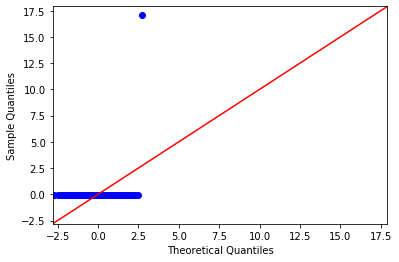

In [44]:
from statsmodels.graphics.gofplots import qqplot
qqplot(ytest-ypred,fit=True,line="45");

# lasso

In [45]:
from sklearn.linear_model import Ridge,Lasso,ElasticNet